In [13]:
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
from hutils.draw_3D import generate_mesh

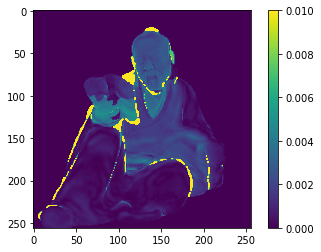

0.00625478


In [9]:
# Task: eval whether the result from the perspective case is correct

# step 1: load data
data_dir = r'Y:\workspace2020\heng\project\data\output_dir_near_light\09_reading\perspective\lambertian\scale_256_256\wo_castshadow\shading'
depth_gt = np.load(os.path.join(data_dir, 'render_para/depth.npy'))
depth_est = np.load(os.path.join(data_dir, 'nearPS/2021_08_08_04_34_24_debug/test/iter_55000_depth_est_w.npy'))
mask = np.load(os.path.join(data_dir, 'render_para/mask.npy'))

err = np.abs(depth_gt - depth_est)
err[~mask] = 0

plt.imshow(err, vmax=0.01)
plt.colorbar()
plt.show()
print(np.mean(err[mask]))



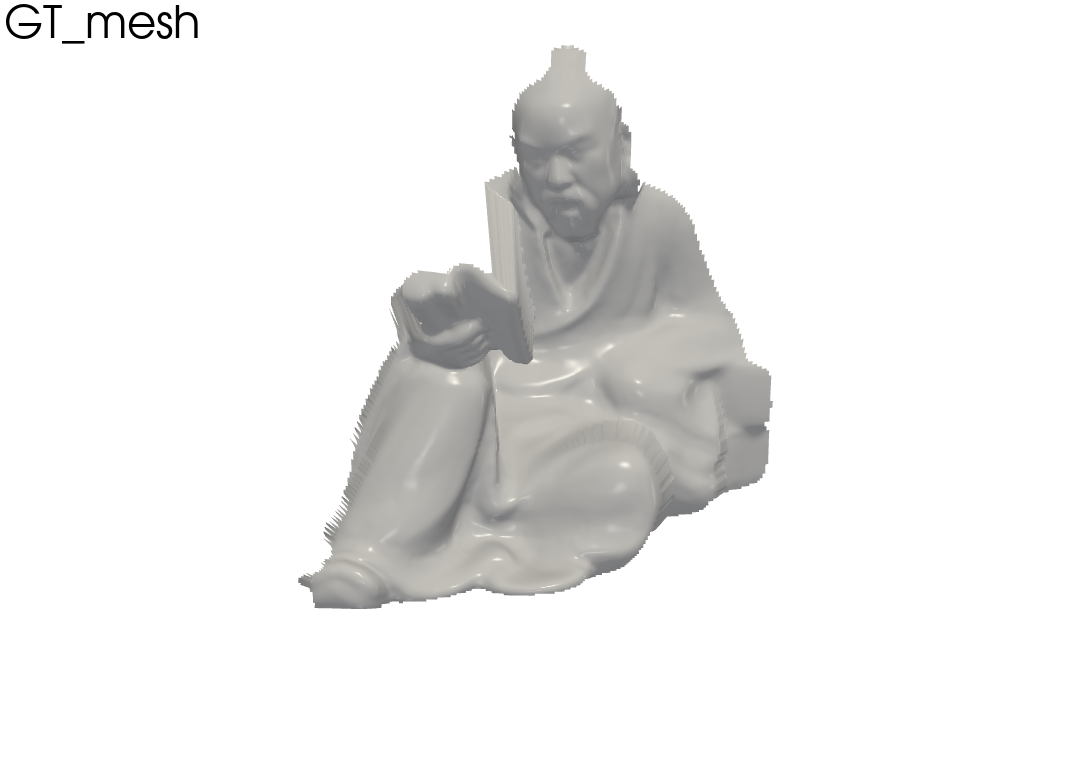

KeyboardInterrupt: 

In [15]:
# evaluate the mesh

row, column = mask.shape
yy, xx = np.mgrid[:row, :column]
yy = np.flip(yy, axis=0)
xx = np.flip(xx, axis=1)
pixel_coords = np.stack([xx, yy], axis=-1).astype(np.float32)  ## -yy, xx
pixel_coords[:, :, 0] = pixel_coords[:, :, 0] / (row - 1)  # xx
pixel_coords[:, :, 1] = pixel_coords[:, :, 1] / (column - 1)

pixel_coords -= 0.5
pixel_coords *= 2.
focal_len = 50
sensor_h = 36
sensor_w = 36

GT_mesh = np.zeros([row, column, 3])
GT_mesh[:, :, 0] = pixel_coords[:, :, 0] * (sensor_w / 2) * depth_gt / focal_len
GT_mesh[:, :, 1] = pixel_coords[:, :, 1] * (sensor_h / 2) * depth_gt / focal_len
GT_mesh[:, :, 2] = depth_gt

Est_mesh = np.zeros([row, column, 3])
Est_mesh[:, :, 0] = pixel_coords[:, :, 0] * (sensor_w / 2) * depth_est / focal_len
Est_mesh[:, :, 1] = pixel_coords[:, :, 1] * (sensor_h / 2) * depth_est / focal_len
Est_mesh[:, :, 2] = depth_est


generate_mesh(GT_mesh, mask, 'GT_mesh.png', (1080, 760), 'GT_mesh')
generate_mesh(Est_mesh, mask, 'Est_mesh.png', (1080, 760), 'Est_mesh')


